<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/05_AppliedMachineLearning/blob/main/04_MachineLearningDigitalMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics: Machine Learning for Digital Marketing

In this course, we will learn how to apply machine learning models for digital marketing. We will understand how to extract data for online behavior, then turn the data into JSON format. In the end, we will apply Gradient Boost to predict how much a given user will spend on our virtual store.

For that end, we will use data from the Google Merchandise Store. So, let's import our dataset:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv')

In [3]:
df.head(2)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928


## Understading our dataset

Nice! So, our dataset has some information about our visitors. Each entry is realted to a session.

In [4]:
df.shape

(12283, 12)

Our dataset has 12283 entries and 12 features. Since each entry is related to one session, we might have multiple entries for the same user. Let's see how many unique users we have in our dataset:

In [5]:
len(df.fullVisitorId.unique( ))

9996

So, we have 9996 unique visitors. Now, let's understand the typing of our columns, as well as if there are any null values:

In [6]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  int64 
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  uint64
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 1.1+ MB


Thus, we have no null values in our dataset. Note that data was identified as an integer. Let's change it so that it is identified as a datetime format:

In [7]:
df.date = df.date.apply(lambda x : pd.to_datetime(str(df.date.iloc[0])[0:4] + '-' + str(df.date.iloc[0])[4:6] + '-' + str(df.date.iloc[0])[6:8]))

In [8]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channelGrouping       12283 non-null  object        
 1   date                  12283 non-null  datetime64[ns]
 2   device                12283 non-null  object        
 3   fullVisitorId         12283 non-null  uint64        
 4   geoNetwork            12283 non-null  object        
 5   sessionId             12283 non-null  object        
 6   socialEngagementType  12283 non-null  object        
 7   totals                12283 non-null  object        
 8   trafficSource         12283 non-null  object        
 9   visitId               12283 non-null  int64         
 10  visitNumber           12283 non-null  int64         
 11  visitStartTime        12283 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(7), uint64(1)
memory usage: 1.1+ MB

Nice! Another important thing is that some Id features are also being interpreted as integers. However, it is important that these are interpreted as strings. So, let's do:

In [9]:
df = df.astype({'fullVisitorId' : object, 'visitId' : object})

Nice! Now let's discuss some of these labels. We have information about:

* Who is visiting our site.
* When is the visit occurring.
* From which channel the visit is being made. 
* The number of visits already made by the user.

This information come from Google Analytics, and we can measure the behavior of users in sites and apps. Note that some values are bounded by { }. These are actually JSONs. For instance, if we take a look at one information under device:


In [10]:
df.device.iloc[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

## Cleaning and treating our dataset

We have a lot of information. To use a model, it would be interesting to have these values in separated columns. Let's try to do this using the json library:

In [11]:
import json

json.loads(df.device.iloc[0])

{'browser': 'Chrome',
 'browserSize': 'not available in demo dataset',
 'browserVersion': 'not available in demo dataset',
 'deviceCategory': 'desktop',
 'flashVersion': 'not available in demo dataset',
 'isMobile': False,
 'language': 'not available in demo dataset',
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset'}

Note that, now, our data is structured in a dictionary. So, to transform these values in new columns of our data frame, we can do:

In [12]:
pd.DataFrame([json.loads(line) for line in df.device])

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12279,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
12280,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12281,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


Nice! Now, let's do the same for the other columns which store JSON format. We can do that with a simple for loop using:

In [13]:
JSON_col = ['device', 'geoNetwork', 'trafficSource', 'totals']

In [14]:
for jsonc in JSON_col:
  df = df.join(pd.DataFrame([json.loads(line) for line in df[jsonc]]))

Now, let's drop our JSON columns:

In [15]:
df.drop(JSON_col, axis = 1, inplace = True)

In [16]:
df

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,2016-09-02,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,2016-09-02,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,2016-09-02,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,2016-09-02,7330357551242339916,7330357551242339916_1483540608,Not Socially Engaged,1483540608,1,1483540608,Chrome,not available in demo dataset,...,NaN,/yt/about/pl/,NaN,NaN,1,1,1,1,1,NaN
12279,Social,2016-09-02,696320405243257438,0696320405243257438_1483580407,Not Socially Engaged,1483580407,1,1483580407,Chrome,not available in demo dataset,...,NaN,/yt/about/,NaN,NaN,1,1,1,1,1,NaN
12280,Social,2016-09-02,5437703324867866371,5437703324867866371_1483592122,Not Socially Engaged,1483592122,1,1483592122,Chrome,not available in demo dataset,...,NaN,/yt/about/,NaN,NaN,1,1,1,1,1,NaN
12281,Social,2016-09-02,8869363093179043393,8869363093179043393_1483601927,Not Socially Engaged,1483601927,2,1483601927,Chrome,not available in demo dataset,...,True,/yt/about/lt/,NaN,NaN,1,2,2,NaN,NaN,NaN


Nice! Now, we have 12283 entries (which is the same as before), but we now have 50 features.

## Understanding our features

Ok, now, let's understand more about our features. First, let's get how many unique values we have in each column:

In [17]:
for col in df.columns:
  print("Column |" + col + "| - " + str(len( df[col].unique( ) )) )

Column |channelGrouping| - 8
Column |date| - 1
Column |fullVisitorId| - 9996
Column |sessionId| - 12276
Column |socialEngagementType| - 1
Column |visitId| - 12272
Column |visitNumber| - 50
Column |visitStartTime| - 12279
Column |browser| - 22
Column |browserVersion| - 1
Column |browserSize| - 1
Column |operatingSystem| - 12
Column |operatingSystemVersion| - 1
Column |isMobile| - 2
Column |mobileDeviceBranding| - 1
Column |mobileDeviceModel| - 1
Column |mobileInputSelector| - 1
Column |mobileDeviceInfo| - 1
Column |mobileDeviceMarketingName| - 1
Column |flashVersion| - 1
Column |language| - 1
Column |screenColors| - 1
Column |screenResolution| - 1
Column |deviceCategory| - 3
Column |continent| - 6
Column |subContinent| - 22
Column |country| - 145
Column |region| - 212
Column |metro| - 53
Column |city| - 296
Column |cityId| - 1
Column |networkDomain| - 1747
Column |latitude| - 1
Column |longitude| - 1
Column |networkLocation| - 1
Column |campaign| - 7
Column |source| - 76
Column |medium|

TypeError: ignored

Note that we actually got an error, because we still have one dictionary in our dataset:

In [18]:
df.adwordsClickInfo

0        {'criteriaParameters': 'not available in demo ...
1        {'criteriaParameters': 'not available in demo ...
2        {'criteriaParameters': 'not available in demo ...
3        {'criteriaParameters': 'not available in demo ...
4        {'criteriaParameters': 'not available in demo ...
                               ...                        
12278    {'criteriaParameters': 'not available in demo ...
12279    {'criteriaParameters': 'not available in demo ...
12280    {'criteriaParameters': 'not available in demo ...
12281    {'criteriaParameters': 'not available in demo ...
12282    {'criteriaParameters': 'not available in demo ...
Name: adwordsClickInfo, Length: 12283, dtype: object

Note, however, that this column has no relevant information ('not available in demo'). Let's just drop it from ou dataset:

In [19]:
df.drop('adwordsClickInfo', axis = 1, inplace = True)

Now, evaluating the number of unique values in each column:

In [20]:
for col in df.columns:
  print("Column |" + col + "| - " + str(len( df[col].unique( ) )) )

Column |channelGrouping| - 8
Column |date| - 1
Column |fullVisitorId| - 9996
Column |sessionId| - 12276
Column |socialEngagementType| - 1
Column |visitId| - 12272
Column |visitNumber| - 50
Column |visitStartTime| - 12279
Column |browser| - 22
Column |browserVersion| - 1
Column |browserSize| - 1
Column |operatingSystem| - 12
Column |operatingSystemVersion| - 1
Column |isMobile| - 2
Column |mobileDeviceBranding| - 1
Column |mobileDeviceModel| - 1
Column |mobileInputSelector| - 1
Column |mobileDeviceInfo| - 1
Column |mobileDeviceMarketingName| - 1
Column |flashVersion| - 1
Column |language| - 1
Column |screenColors| - 1
Column |screenResolution| - 1
Column |deviceCategory| - 3
Column |continent| - 6
Column |subContinent| - 22
Column |country| - 145
Column |region| - 212
Column |metro| - 53
Column |city| - 296
Column |cityId| - 1
Column |networkDomain| - 1747
Column |latitude| - 1
Column |longitude| - 1
Column |networkLocation| - 1
Column |campaign| - 7
Column |source| - 76
Column |medium|

Note that, in many of our columns, there is only one unique value. It does not make sense for our model to keep these features. So, let's drop those:

In [21]:
drop_columns = []

for col in df.columns:
  if (len( df[col].unique( ) ) == 1 and col != 'date':
    drop_columns.append(col)

df.drop(drop_columns, axis = 1, inplace = True)

SyntaxError: ignored

Now that we cleaned our dataset, let's see our columns again:

In [ ]:
df.info( )

Now, we have only 30 features!

# Feature engineering

Ok, now, let's understand our features, and try to create interesting features that can translate the consumers behavior. 

To understand if the user interacted with our page, we can use some quantitative features, such as the number of page views, bounces, and hits. Also, feature newVisits shows a boolean which stores if the visit is new or not.

Let's try to create a new transformed feature that is the sum of these variables. This new transformed feature will store information about how engaged a given user is.

In [22]:
df[['pageviews', 'bounces', 'hits', 'newVisits']]

,pageviews,bounces,hits,newVisits
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,NaN
4,4,NaN,5,1
...,...,...,...,...
12278,1,1,1,1
12279,1,1,1,1
12280,1,1,1,1
12281,2,NaN,2,NaN


Note that bounces and newVisits are booleans, which can be 1 or NaN. First, let's fill those null values with 0:

In [23]:
df.bounces.fillna(0, inplace = True)
df.newVisits.fillna(0, inplace = True)

Note that these features are actually being interpreted as objects. So, let's transform them into numeric features:

In [24]:
quant = ['pageviews', 'bounces', 'hits', 'newVisits']

for col in quant:
  df[col] = pd.to_numeric(df[col])

df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   channelGrouping            12283 non-null  object        
 1   date                       12283 non-null  datetime64[ns]
 2   fullVisitorId              12283 non-null  object        
 3   sessionId                  12283 non-null  object        
 4   socialEngagementType       12283 non-null  object        
 5   visitId                    12283 non-null  object        
 6   visitNumber                12283 non-null  int64         
 7   visitStartTime             12283 non-null  int64         
 8   browser                    12283 non-null  object        
 9   browserVersion             12283 non-null  object        
 10  browserSize                12283 non-null  object        
 11  operatingSystem            12283 non-null  object        
 12  oper

Now, our features are integers!

## Looking at our target feature

Now, in our model, we will try to predict the transaction revenue. This is present in the transactionRevenue column:

In [25]:
df.transactionRevenue

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
12278    NaN
12279    NaN
12280    NaN
12281    NaN
12282    NaN
Name: transactionRevenue, Length: 12283, dtype: object

Note that it has lots of missing values. This occurs because most of the visits actually have no revenue. In fact, we have 12119 missing entries, and only 164 non-null entries.

In [26]:
df.transactionRevenue.isna( ).value_counts( )

True     12119
False      164
Name: transactionRevenue, dtype: int64

Since these missing values are related to visits with no revenue, we can replace the missing values with a zero:

In [27]:
df.transactionRevenue.fillna(0, inplace = True)

Nice! Now, let's understand more about the values in this column. Let's get the value counts:

In [28]:
df.transactionRevenue.value_counts( )

0           12119
13590000        3
33590000        3
19190000        3
27190000        2
            ...  
24730000        1
6990000         1
14480000        1
95180000        1
25240000        1
Name: transactionRevenue, Length: 147, dtype: int64

Note that our revenue seems to be very large. In fact, we have to divide these numbers by 1e6 (to use them in BRL):

In [29]:
df.transactionRevenue = pd.to_numeric(df.transactionRevenue)/1000000

In [30]:
df.transactionRevenue.value_counts( )

0.00     12119
13.59        3
33.59        3
19.19        3
27.19        2
         ...  
24.73        1
6.99         1
14.48        1
95.18        1
25.24        1
Name: transactionRevenue, Length: 147, dtype: int64

Nice! Now, our values make a lot more sense.

## Creating our independent variables

So, our target will be explained by the independent features. First, we already saw that we have 9997 visitors, but we have 12283 entries. That occurs because some of our visitors visited our site more than once. To get an aggregated result, we can use groupby:

In [31]:
df_quant = df.groupby('fullVisitorId')[['pageviews', 'bounces', 'hits', 'newVisits', 'transactionRevenue']].sum( ).reset_index( )
df_quant

,fullVisitorId,pageviews,bounces,hits,newVisits,transactionRevenue
0,231955209315461,4,1,4,1,0.0
1,266926879733529,12,0,16,1,0.0
2,852896709559982,3,0,3,1,0.0
3,1676995035957087,1,1,1,1,0.0
4,2365800130207040,1,1,1,1,0.0
...,...,...,...,...,...,...
9991,9996691020299725061,10,0,10,0,0.0
9992,9996793353803109760,1,1,1,1,0.0
9993,9997125062030599880,8,0,8,1,0.0
9994,9997464307347866920,1,1,1,1,0.0


Nice. Now we have the sum of pageviews, bounces, hits and new visits for each visitor. Now, owr dataframe only has 9996 entries, which are related to each visitor:

In [32]:
df_quant.shape

(9996, 6)

# Implementing our model

Ok. Now, let's start implementing our model. First, let's separate our targets and our independent variables:

In [33]:
y = df_quant.transactionRevenue.copy( )
X = df_quant[['pageviews', 'bounces', 'hits', 'newVisits']].copy( )

Now, let's perform our train test split:

In [34]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

Nice. The train set will be used to fit our model, while the test set will be used to test our model.

Now, let's train a simple Linear Regression model:

In [35]:
from sklearn.linear_model import LinearRegression

model_LinReg = LinearRegression( )
model_LinReg.fit(X_train, y_train)

LinearRegression()

Now, let's get our model prediction at our test set:

In [36]:
y_pred = model_LinReg.predict(X_test)

Now, let's get some metrics to understand if our model is good enough. First, let's create a dataframe to compare our prediction with our true values, and to get the error from our predictions:

In [37]:
results_LinReg = pd.DataFrame( )
results_LinReg['y_test'] = y_test
results_LinReg['y_pred'] = y_pred
results_LinReg['error']  = y_pred - y_test

In [38]:
results_LinReg.head(5)

,y_test,y_pred,error
1078,0.0,16.410906,16.410906
4336,0.0,30.283348,30.283348
8966,0.0,0.456503,0.456503
5456,0.0,-1.532710,-1.532710
2407,0.0,-1.532710,-1.532710


Note that, here, we only got data were our real revenue was 0. Our errors were pretty high. What if we filter our data, getting only those cases were y_test != 0? Let's try:

In [39]:
results_LinReg.query('y_test > 0').head(10)

,y_test,y_pred,error
2150,67.19,9.405808,-57.784192
88,100.78,20.164305,-80.615695
7816,64.78,11.396390,-53.383610
1183,112.37,54.261707,-58.108293
9679,95.80,8.773197,-87.026803
4762,217.44,38.834649,-178.605351
2310,702.90,29.054288,-673.845712
349,278.03,48.367454,-229.662546
9901,362.84,83.363192,-279.476808
2823,9.16,33.723279,24.563279


Still, our predictions seem very bad. Note that, in our model, we have lots of zero values in our target (target almost constant). It is very hard for a linear regression model to present a good fit in these cases. 

Let's get the Mean Squared Error:

In [40]:
results_LinReg['error^2'] = (y_pred - y_test)**2

In [41]:
results_LinReg['error^2'].mean( )

531.2811449521541

It is hard to understand what this value means. Let's get the Root Mean Squared Error, where the unit for the error is also in BRL:

In [42]:
import numpy as np

np.sqrt( results_LinReg['error^2'].mean( ) )

23.049536762203143

So, on average, our model is getting an error of BRL 23.04. This is a very high values, especially when we compare it to the average and the standard deviation of our target: 

In [43]:
df_quant.transactionRevenue.mean( )

1.7791316526610639

In [44]:
df_quant.transactionRevenue.std( )

25.132413530165568

Our error is much higher than our mean, and is very close to the standard deviation.

Note that we can also get these values using sklearn:

In [45]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

531.2811449521583

In [46]:
mean_squared_error(y_test, y_pred, squared = False)

23.049536762203235

## Visualizing the quality of our model

We can also know if our model is good or not by analyzing some graphics related to its quality. First, let's plot a boxplot for our prediction and test:

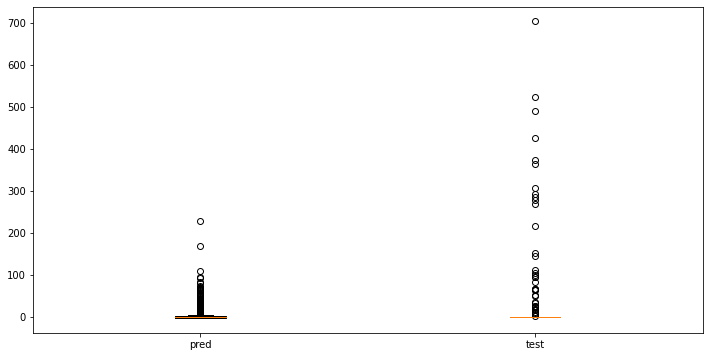

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12, 6))

plt.boxplot([y_pred, y_test], labels = ['pred', 'test']);

It seems that our test set has much higher values when compared to our prediction. Let's change the y_limits to understand more about the box itself:

(-5.0, 10.0)

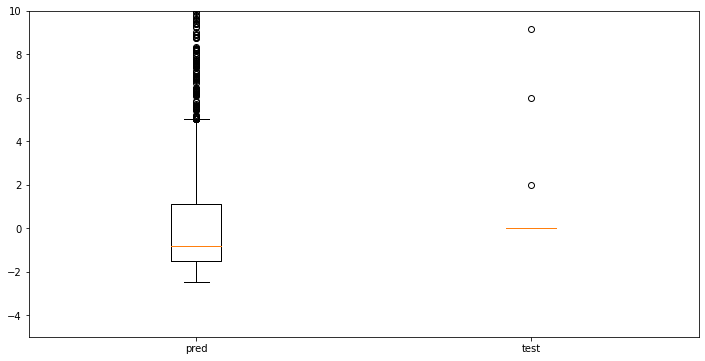

In [48]:
fig = plt.figure(figsize = (12, 6))

ax = plt.boxplot([y_pred, y_test], labels = ['pred', 'test']);
plt.ylim(-5, 10)

Note that we actually have some negative values in our prediction, which shouldn't happen, since we are predicting revenue! Also, the distribution of our data is very different in the test and prediction sets.

Let's get an histogram of our errors:

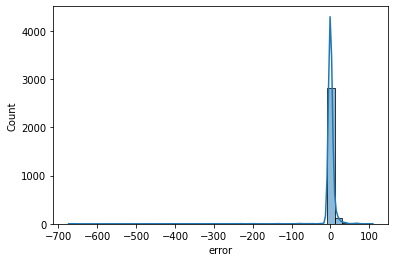

In [49]:
sns.histplot(results_LinReg.error, bins = 40, kde = True)

So, most of our errors are near 0. However, note that the errors can be as high as 700!

# Returning to feature engineering

Ok, so, now that we have built a very bad first model, let's see how can we improve upon its prediction. First, let's add some qualitative features to our dataset. But which features should we add? Let's see our features again:

In [50]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   channelGrouping            12283 non-null  object        
 1   date                       12283 non-null  datetime64[ns]
 2   fullVisitorId              12283 non-null  object        
 3   sessionId                  12283 non-null  object        
 4   socialEngagementType       12283 non-null  object        
 5   visitId                    12283 non-null  object        
 6   visitNumber                12283 non-null  int64         
 7   visitStartTime             12283 non-null  int64         
 8   browser                    12283 non-null  object        
 9   browserVersion             12283 non-null  object        
 10  browserSize                12283 non-null  object        
 11  operatingSystem            12283 non-null  object        
 12  oper

But how can we deal with such qualitative variables in our model? Before, we summed up all quantitative variables. What should we do for the qualitative features?

Usually, when there are multiple visits to a website, it is very interesting to consider data from the *first* and *last* visits. Let's try to get the number of the last visit from each user:

In [51]:
last_visits = df.groupby('fullVisitorId', as_index = False)['visitNumber'].max( )
last_visits

,fullVisitorId,visitNumber
0,231955209315461,2
1,266926879733529,1
2,852896709559982,1
3,1676995035957087,1
4,2365800130207040,1
...,...,...
9991,9996691020299725061,3
9992,9996793353803109760,1
9993,9997125062030599880,1
9994,9997464307347866920,1


Now, let's get information from the last visit from each user:

In [52]:
users_unique_visits = df.drop_duplicates( subset = ['fullVisitorId', 'visitNumber'] )

visits = pd.merge( last_visits, users_unique_visits, left_on = ['fullVisitorId', 'visitNumber'], right_on = ['fullVisitorId', 'visitNumber'], how = 'left' )

In [53]:
visits

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,socialEngagementType,visitId,visitStartTime,browser,browserVersion,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,231955209315461,2,Organic Search,2016-09-02,231955209315461_1474986933,Not Socially Engaged,1474986933,1474986933,Chrome,not available in demo dataset,...,True,NaN,NaN,NaN,1,3,3,0,0,0.0
1,266926879733529,1,Organic Search,2016-09-02,266926879733529_1484803608,Not Socially Engaged,1484803608,1484803608,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,16,12,0,1,0.0
2,852896709559982,1,Organic Search,2016-09-02,852896709559982_1501014397,Not Socially Engaged,1501014397,1501014397,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,3,3,0,1,0.0
3,1676995035957087,1,Organic Search,2016-09-02,001676995035957087_1497299834,Not Socially Engaged,1497299834,1497299834,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,0.0
4,2365800130207040,1,Social,2016-09-02,0002365800130207040_1472974804,Not Socially Engaged,1472974804,1472974804,Edge,not available in demo dataset,...,NaN,/yt/about/ru/,NaN,NaN,1,1,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9996691020299725061,3,Referral,2016-09-02,9996691020299725061_1482388264,Not Socially Engaged,1482388264,1482388264,Chrome,not available in demo dataset,...,True,/,NaN,NaN,1,10,10,0,0,0.0
9992,9996793353803109760,1,Social,2016-09-02,9996793353803109760_1480566609,Not Socially Engaged,1480566609,1480566609,Chrome,not available in demo dataset,...,NaN,/yt/about/th/,NaN,NaN,1,1,1,1,1,0.0
9993,9997125062030599880,1,Organic Search,2016-09-02,9997125062030599880_1484217422,Not Socially Engaged,1484217422,1484217422,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,8,8,0,1,0.0
9994,9997464307347866920,1,Organic Search,2016-09-02,9997464307347866920_1489504370,Not Socially Engaged,1489504370,1489504370,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,0.0


Nice! Now, we have information about the last visit of each user. Let's now get the information about the first visit:

In [54]:
first_visits = df.groupby('fullVisitorId')['visitNumber'].min( )
visits = visits.join( first_visits, on = 'fullVisitorId', how = 'left', rsuffix = '_first' )

In [55]:
visits = pd.merge( visits, users_unique_visits, left_on = ['fullVisitorId', 'visitNumber_first'], right_on = ['fullVisitorId', 'visitNumber'], how = 'left', suffixes = ['_last', '_first'] )

In [56]:
visits

,fullVisitorId,visitNumber_last,channelGrouping_last,date_last,sessionId_last,socialEngagementType_last,visitId_last,visitStartTime_last,browser_last,browserVersion_last,...,isTrueDirect_first,referralPath_first,adContent_first,campaignCode_first,visits_first,hits_first,pageviews_first,bounces_first,newVisits_first,transactionRevenue_first
0,231955209315461,2,Organic Search,2016-09-02,231955209315461_1474986933,Not Socially Engaged,1474986933,1474986933,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,0.0
1,266926879733529,1,Organic Search,2016-09-02,266926879733529_1484803608,Not Socially Engaged,1484803608,1484803608,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,16,12,0,1,0.0
2,852896709559982,1,Organic Search,2016-09-02,852896709559982_1501014397,Not Socially Engaged,1501014397,1501014397,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,3,3,0,1,0.0
3,1676995035957087,1,Organic Search,2016-09-02,001676995035957087_1497299834,Not Socially Engaged,1497299834,1497299834,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,0.0
4,2365800130207040,1,Social,2016-09-02,0002365800130207040_1472974804,Not Socially Engaged,1472974804,1472974804,Edge,not available in demo dataset,...,NaN,/yt/about/ru/,NaN,NaN,1,1,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9996691020299725061,3,Referral,2016-09-02,9996691020299725061_1482388264,Not Socially Engaged,1482388264,1482388264,Chrome,not available in demo dataset,...,True,/,NaN,NaN,1,10,10,0,0,0.0
9992,9996793353803109760,1,Social,2016-09-02,9996793353803109760_1480566609,Not Socially Engaged,1480566609,1480566609,Chrome,not available in demo dataset,...,NaN,/yt/about/th/,NaN,NaN,1,1,1,1,1,0.0
9993,9997125062030599880,1,Organic Search,2016-09-02,9997125062030599880_1484217422,Not Socially Engaged,1484217422,1484217422,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,8,8,0,1,0.0
9994,9997464307347866920,1,Organic Search,2016-09-02,9997464307347866920_1489504370,Not Socially Engaged,1489504370,1489504370,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,0.0


Nice! Now, we got information about the first and last visit for each user. Now, let's understand which features should we consider in our model. First, let's drop the quantitative features we considered previously:

In [57]:
quant = ['pageviews', 'bounces', 'hits', 'newVisits', 'transactionRevenue']

In [58]:
for col in quant:
  visits.drop(col + '_last', axis = 1, inplace = True)
  visits.drop(col + '_first', axis = 1, inplace = True)

Also, our Id features should not be considered in our model, as it does not bring any relevant characteristic of our data. So, lets drop them:

In [59]:
id_cols = ['sessionId', 'visitId']
for col in id_cols:
  visits.drop(col + '_last', axis = 1, inplace = True)
  visits.drop(col + '_first', axis = 1, inplace = True)

So, now, our dataset has 46 columns.

In [60]:
visits.shape

(9996, 84)

Some of our features don't need to exist for the first and last visits simultaneously. Let's drop some of those:

In [61]:
geo = ['continent_first', 'subContinent_first', 'country_first', 'region_first', 'metro_first', 'city_first', 'networkDomain_first']
visits.drop(geo, axis = 1, inplace = True)

Now, let's take a look at our updated dataset:

In [62]:
visits

,fullVisitorId,visitNumber_last,channelGrouping_last,date_last,socialEngagementType_last,visitStartTime_last,browser_last,browserVersion_last,browserSize_last,operatingSystem_last,...,networkLocation_first,campaign_first,source_first,medium_first,keyword_first,isTrueDirect_first,referralPath_first,adContent_first,campaignCode_first,visits_first
0,231955209315461,2,Organic Search,2016-09-02,Not Socially Engaged,1474986933,Chrome,not available in demo dataset,not available in demo dataset,iOS,...,not available in demo dataset,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1
1,266926879733529,1,Organic Search,2016-09-02,Not Socially Engaged,1484803608,Chrome,not available in demo dataset,not available in demo dataset,Windows,...,not available in demo dataset,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1
2,852896709559982,1,Organic Search,2016-09-02,Not Socially Engaged,1501014397,Safari,not available in demo dataset,not available in demo dataset,iOS,...,not available in demo dataset,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1
3,1676995035957087,1,Organic Search,2016-09-02,Not Socially Engaged,1497299834,Chrome,not available in demo dataset,not available in demo dataset,Android,...,not available in demo dataset,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1
4,2365800130207040,1,Social,2016-09-02,Not Socially Engaged,1472974804,Edge,not available in demo dataset,not available in demo dataset,Windows,...,not available in demo dataset,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9996691020299725061,3,Referral,2016-09-02,Not Socially Engaged,1482388264,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,...,not available in demo dataset,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN,1
9992,9996793353803109760,1,Social,2016-09-02,Not Socially Engaged,1480566609,Chrome,not available in demo dataset,not available in demo dataset,Android,...,not available in demo dataset,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN,1
9993,9997125062030599880,1,Organic Search,2016-09-02,Not Socially Engaged,1484217422,Safari,not available in demo dataset,not available in demo dataset,iOS,...,not available in demo dataset,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1
9994,9997464307347866920,1,Organic Search,2016-09-02,Not Socially Engaged,1489504370,Chrome,not available in demo dataset,not available in demo dataset,Android,...,not available in demo dataset,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1


In [63]:
visits.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9995
Data columns (total 77 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   fullVisitorId                    9996 non-null   object        
 1   visitNumber_last                 9996 non-null   int64         
 2   channelGrouping_last             9996 non-null   object        
 3   date_last                        9996 non-null   datetime64[ns]
 4   socialEngagementType_last        9996 non-null   object        
 5   visitStartTime_last              9996 non-null   int64         
 6   browser_last                     9996 non-null   object        
 7   browserVersion_last              9996 non-null   object        
 8   browserSize_last                 9996 non-null   object        
 9   operatingSystem_last             9996 non-null   object        
 10  operatingSystemVersion_last      9996 non-null   object     

## Creating new features

When we understand our business, we can also try to create new variables from the ones that we already have in our dataset. First, let's merge our quantitative variables to our new visits dataset:

In [64]:
visits = pd.merge(visits, df_quant, left_on = 'fullVisitorId', right_on = 'fullVisitorId', how = 'left')

So, we have a feature for the visitStartTime_last and visitStartTime_first. We can create a new feature to store how long it took from the first to the last visit:


In [65]:
visits['StartTime_diff'] = visits.visitStartTime_last - visits.visitStartTime_first
visits['StartTime_diff'].head(50)

0       77157
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23    2730545
24          0
25          0
26          0
27          0
28          0
29          0
30          0
31          0
32          0
33    1242419
34          0
35          0
36          0
37          0
38          0
39          0
40          0
41          0
42          0
43          0
44          0
45          0
46          0
47      47956
48          0
49          0
Name: StartTime_diff, dtype: int64

So, most of our entries have a 0 value, because we only have one visit. Let's add another feature, related to the number of visits each visitor did:

In [66]:
visit_num = df.groupby('fullVisitorId')['visitNumber'].count( )

In [67]:
visits['tot_visits'] = visit_num.values

Let's now create some features to store the year, month and day the visit was performed:

In [68]:
visits['year_last']   = visits.date_last.dt.year
visits['year_first']  = visits.date_first.dt.year
visits['month_last']  = visits.date_last.dt.month
visits['month_first'] = visits.date_first.dt.month
visits['day_last']    = visits.date_last.dt.day
visits['day_first']   = visits.date_first.dt.day

In [69]:
visits.drop(['date_last', 'date_first'], axis = 1, inplace = True)

Finally, let's finish by excluding some features that may not help in our model:

In [70]:
remove_feat = ['socialEngagementType', 'browserVersion', 'browserSize', 'operatingSystemVersion', 'mobileDeviceBranding', 'mobileDeviceModel',
               'mobileInputSelector', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors', 'screenResolution']

for col in remove_feat:
  visits.drop(col + '_last', axis = 1, inplace = True)
  visits.drop(col + '_first', axis = 1, inplace = True)

Finally, let's also drop the visitor id:

In [71]:
visits.drop('fullVisitorId', axis = 1, inplace = True)

# Rebuilding our model

Finally, let's try to use our dataset to build our new model. Let's separe our target and our independent features:

In [72]:
y = visits.transactionRevenue.copy( )
X = visits.drop('transactionRevenue', axis = 1)

Now, let's use a label encoder to treat our qualitative features:

In [73]:
qualit_feat = visits.dtypes[visits.dtypes == object].keys( )
qualit_feat

Index(['channelGrouping_last', 'browser_last', 'operatingSystem_last',
       'deviceCategory_last', 'continent_last', 'subContinent_last',
       'country_last', 'region_last', 'metro_last', 'city_last', 'cityId_last',
       'networkDomain_last', 'latitude_last', 'longitude_last',
       'networkLocation_last', 'campaign_last', 'source_last', 'medium_last',
       'keyword_last', 'isTrueDirect_last', 'referralPath_last',
       'adContent_last', 'campaignCode_last', 'visits_last',
       'channelGrouping_first', 'browser_first', 'operatingSystem_first',
       'deviceCategory_first', 'cityId_first', 'latitude_first',
       'longitude_first', 'networkLocation_first', 'campaign_first',
       'source_first', 'medium_first', 'keyword_first', 'isTrueDirect_first',
       'referralPath_first', 'adContent_first', 'campaignCode_first',
       'visits_first'],
      dtype='object')

In [74]:
# Label encoder

from sklearn.preprocessing import LabelEncoder

for q in qualit_feat:
  lbl = LabelEncoder( )
  strings = list(X[q].values.astype('str'))
  lbl.fit(strings)
  X[q] = lbl.transform(strings)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [75]:
X.head( )

,visitNumber_last,channelGrouping_last,visitStartTime_last,browser_last,operatingSystem_last,isMobile_last,deviceCategory_last,continent_last,subContinent_last,country_last,...,hits,newVisits,StartTime_diff,tot_visits,year_last,year_first,month_last,month_first,day_last,day_first
0,2,4,1474986933,5,11,True,2,2,11,138,...,4,1,77157,2,2016,2016,9,9,2,2
1,1,4,1484803608,5,9,False,0,3,17,55,...,16,1,0,1,2016,2016,9,9,2,2
2,1,4,1501014397,18,11,True,1,2,11,138,...,3,1,0,1,2016,2016,9,9,2,2
3,1,4,1497299834,5,1,True,1,4,21,43,...,1,1,0,1,2016,2016,9,9,2,2
4,1,7,1472974804,7,9,False,0,4,7,135,...,1,1,0,1,2016,2016,9,9,2,2


Ok, so, finally, let's build our linear mode once again!

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

model_LinReg2 = LinearRegression( )
model_LinReg2.fit(X_train, y_train)
y_pred = model_LinReg2.predict(X_test)

So, let's get our error once again:

In [77]:
results_LinReg2 = pd.DataFrame( )
results_LinReg2['y_test'] = y_test
results_LinReg2['y_pred'] = y_pred
results_LinReg2['error']  = y_pred - y_test

In [78]:
results_LinReg2.head(10)

,y_test,y_pred,error
1078,0.0,-5.830011,-5.830011
4336,0.0,20.655372,20.655372
8966,0.0,2.042050,2.042050
5456,0.0,-2.106556,-2.106556
2407,0.0,-1.928762,-1.928762
8995,0.0,-0.037060,-0.037060
576,0.0,-2.660138,-2.660138
7441,0.0,19.934431,19.934431
5967,0.0,2.318612,2.318612
439,0.0,24.425143,24.425143


Note that, still, we have some negative values. Let's first fix these values, equating them to 0:

In [79]:
y_pred[y_pred < 0] = 0
results_LinReg2['y_pred'] = y_pred
results_LinReg2['error']  = y_pred - y_test

In [80]:
results_LinReg2

,y_test,y_pred,error
1078,0.0,0.000000,0.000000
4336,0.0,20.655372,20.655372
8966,0.0,2.042050,2.042050
5456,0.0,0.000000,0.000000
2407,0.0,0.000000,0.000000
...,...,...,...
5579,0.0,0.000000,0.000000
1074,0.0,15.138188,15.138188
9299,0.0,5.499548,5.499548
3091,0.0,0.000000,0.000000


Let's check the revenue for those users who actually spent something:

In [81]:
results_LinReg2.query('y_test > 0').head(10)

,y_test,y_pred,error
2150,67.19,14.039063,-53.150937
88,100.78,7.188194,-93.591806
7816,64.78,8.573910,-56.206090
1183,112.37,46.594398,-65.775602
9679,95.80,14.106065,-81.693935
4762,217.44,25.978615,-191.461385
2310,702.90,29.210337,-673.689663
349,278.03,51.485191,-226.544809
9901,362.84,98.360054,-264.479946
2823,9.16,40.817220,31.657220


Still, we got high errors. If we evaluate the RMSE, we also have a pretty high value still:

In [82]:
mean_squared_error(y_test, y_pred, squared = False)

25.04357342924439

## Gradient Boosting

So, let's try to improve our model once again, now using a Gradient Boosting algorithm:

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

model_GradBoost = GradientBoostingRegressor( random_state = SEED )
model_GradBoost.fit(X_train, y_train)
y_pred = model_GradBoost.predict(X_test)

Ok. Now, let's get the errors:

In [84]:
y_pred[y_pred < 0] = 0

results_GradBoost = pd.DataFrame( )
results_GradBoost['y_test'] = y_test
results_GradBoost['y_pred'] = y_pred
results_GradBoost['error']  = y_pred - y_test

In [85]:
results_GradBoost.head(10)

,y_test,y_pred,error
1078,0.0,0.977901,0.977901
4336,0.0,13.376232,13.376232
8966,0.0,0.000000,0.000000
5456,0.0,0.031798,0.031798
2407,0.0,0.031798,0.031798
8995,0.0,0.031798,0.031798
576,0.0,0.031798,0.031798
7441,0.0,28.762071,28.762071
5967,0.0,0.031798,0.031798
439,0.0,4.339894,4.339894


By a first look, it indeed seems that our errors are lower. Let's get the MSE:

In [86]:
mean_squared_error(y_pred, y_test, squared = False)

23.087104044847077

Again, our errors were pretty high. Let's look at the distribution of results:

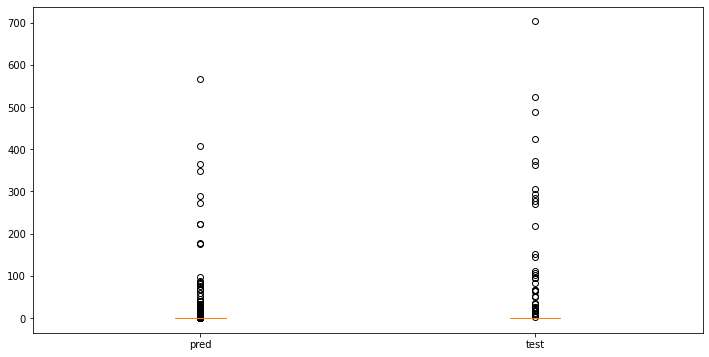

In [87]:
fig = plt.figure(figsize = (12, 6))

plt.boxplot([y_pred, y_test], labels = ['pred', 'test']);

(-1.0, 10.0)

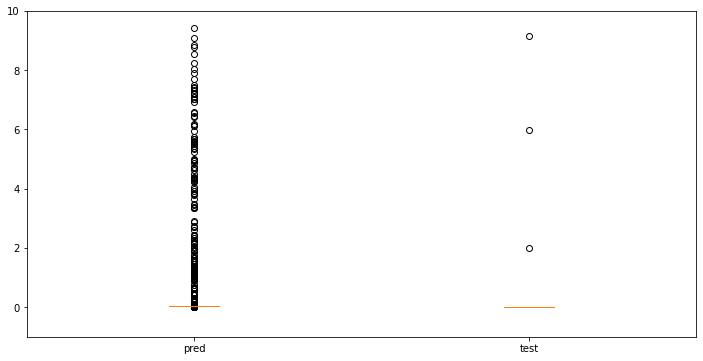

In [88]:
fig = plt.figure(figsize = (12, 6))

plt.boxplot([y_pred, y_test], labels = ['pred', 'test']);

plt.ylim(-1, 10)

Even though we have still a lot of predictions with lower values, it seems that the gradient boosting algorithm was able to improve our distribution. The median and the quartiles seem to be the same as the test set.

# Classification - Trying to predict when someone will spend

We saw that it is very hard to identify how much someone will spend. What if we try to predict WHEN someone will spend? 

Our problem is now a classification problem. First, let's create a new feature to identify if someone spent or not:

In [122]:
visits['ifSpent'] = visits.transactionRevenue.apply(lambda x : 1 if x > 0 else 0)

Now, let's get the value counts:

In [123]:
visits.ifSpent.value_counts( )

0    9850
1     146
Name: ifSpent, dtype: int64

So, we have a very unbalanced dataset. Let's try to balance it using a downsample algorithm:

In [124]:
spent_0 = visits.query('ifSpent == 0')
spent_1 = visits.query('ifSpent == 1')

In [125]:
from sklearn.utils import resample

spent_0_new = resample(spent_0, replace = False, n_samples = 1500)

Now, let's define our dataset again:

In [126]:
visits_resampled = pd.concat([spent_0_new, spent_1])

In [135]:
visits_resampled.drop('transactionRevenue', axis = 1, inplace = True)
visits_resampled

,visitNumber_last,channelGrouping_last,visitStartTime_last,browser_last,operatingSystem_last,isMobile_last,deviceCategory_last,continent_last,subContinent_last,country_last,...,newVisits,StartTime_diff,tot_visits,year_last,year_first,month_last,month_first,day_last,day_first,ifSpent
7177,1,Social,1477679542,Safari,Macintosh,False,desktop,Asia,Southeast Asia,Vietnam,...,1,0,1,2016,2016,9,9,2,2,0
8140,1,Social,1489651579,Chrome,Android,True,mobile,Americas,Northern America,United States,...,1,0,1,2016,2016,9,9,2,2,0
4973,6,Social,1476394269,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,...,0,0,1,2016,2016,9,9,2,2,0
6190,1,Social,1477298063,Safari,Macintosh,False,desktop,Asia,Western Asia,Turkey,...,1,0,1,2016,2016,9,9,2,2,0
5184,1,Organic Search,1494338763,Chrome,Linux,False,desktop,Europe,Northern Europe,Ireland,...,1,0,1,2016,2016,9,9,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9780,4,Referral,1482298425,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,...,0,285062,3,2016,2016,9,9,2,2,1
9841,2,Referral,1487806191,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,...,0,0,1,2016,2016,9,9,2,2,1
9901,9,Referral,1500155697,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,...,1,8012989,8,2016,2016,9,9,2,2,1
9933,1,Referral,1498889138,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,...,1,0,1,2016,2016,9,9,2,2,1


Great! Now, performing the train-test-split:

In [142]:
y = visits_resampled.ifSpent.copy( ).astype(int)
X = visits_resampled.drop('ifSpent', axis = 1)

for q in qualit_feat:
  lbl = LabelEncoder( )
  strings = list(X[q].values.astype('str'))
  lbl.fit(strings)
  X[q] = lbl.transform(strings)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now, let's retrain our model, now using a Gradient Boost Classifier model.

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBClass = GradientBoostingClassifier( )
model_GBClass.fit(X_train, y_train)

GradientBoostingClassifier()

Now, let's look at our metrics for classification and our confusion matrix:

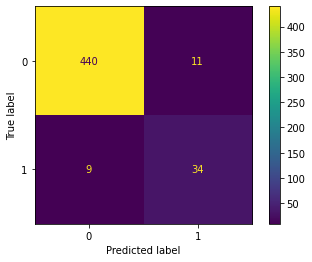

In [144]:
y_pred_gb = model_GBClass.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot( )

In [145]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       451
           1       0.76      0.79      0.77        43

    accuracy                           0.96       494
   macro avg       0.87      0.88      0.88       494
weighted avg       0.96      0.96      0.96       494



Nice! Our model seems to be much better. We have a 76% and a 79% precision and recall, and we are able to predict almost all of the times someone will or will not spent!

Now, let's try to use an XGBoost algorithm:

In [146]:
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 81 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [156]:
X_train = X_train.loc[:, ~X_train.columns.duplicated( )] # This line of code removes the duplicated columns
X_test  = X_test.loc[:, ~X_test.columns.duplicated( )] # This line of code removes the duplicated columns

In [153]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(seed = 42, n_estimators = 300)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

Now, let's plot the confusion matrix and the metrics:

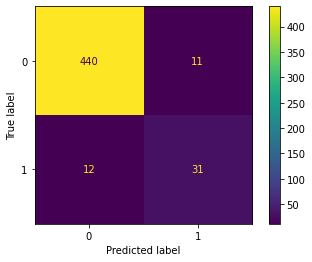

In [158]:
y_pred_xgb = model_xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot( )

In [160]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       451
           1       0.74      0.72      0.73        43

    accuracy                           0.95       494
   macro avg       0.86      0.85      0.85       494
weighted avg       0.95      0.95      0.95       494



Note that the XGBoost algorithm actually got a lower recall!